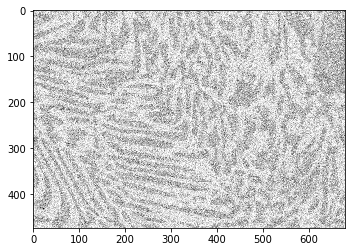

In [4]:
import matplotlib.pyplot as plt
from skimage import io, img_as_float
import numpy as np


img = img_as_float(io.imread("C:/Users/Haroon/Desktop/Deep-Learning-Theory/Alloy_noisy.jpg"))

plt.imshow(img,cmap ='gray')




(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 5.0000e+00, 5.0000e+00, 3.0000e+01, 6.1000e+01,
        1.5300e+02, 4.1900e+02, 8.9600e+02, 2.05

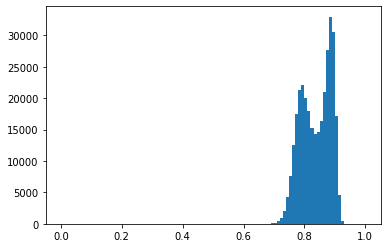

In [9]:
#plt.hist(img.flat, bins=100, range=(0, 1)) 

# Very noisy image so histogram looks horrible. Let us denoise and see if it helps.

from skimage.restoration import denoise_nl_means, estimate_sigma

sigma_est = np.mean(estimate_sigma(img, multichannel=True))
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, 
                               patch_size=5, patch_distance=3, multichannel=True)
                           
#plt.hist(denoise_img.flat, bins=100, range=(0, 1)) 
# Much better histogram and now we can see two separate peaks. 
#Still close enough so cannot use histogram based segmentation.
#Let us see if we can get any better by some preprocessing.
#Let's try histogram equalization

from skimage import exposure   #Contains functions for hist. equalization

#eq_img = exposure.equalize_hist(denoise_img)
#An algorithm for local contrast enhancement, 
#that uses histograms computed over different tile regions of the image. 
#Local details can therefore be enhanced even in regions that are darker or lighter than most of the image.


eq_img = exposure.equalize_adapthist(denoise_img)
#plt.imshow(eq_img, cmap='gray')
plt.hist(denoise_img.flat, bins=100, range=(0., 1))

#Not any better. Let us stretch the hoistogram between 0.7 and 0.95



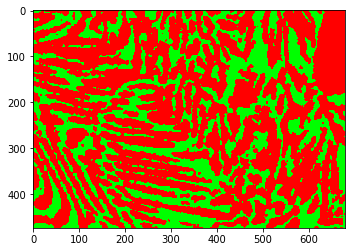

In [11]:
# The range of the binary image spans over (0, 1).
# For markers, let us include all between each peak.
markers = np.zeros(img.shape, dtype=np.uint)

markers[(eq_img < 0.8) & (eq_img > 0.7)] = 1
markers[(eq_img > 0.85) & (eq_img < 0.99)] = 2

from skimage.segmentation import random_walker
# Run random walker algorithm
# https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.random_walker
labels = random_walker(eq_img, markers, beta=10, mode='bf')
#plt.imsave("images/markers.jpg", markers)
segm1 = (labels == 1)
segm2 = (labels == 2)
all_segments = np.zeros((eq_img.shape[0], eq_img.shape[1], 3)) #nothing but denoise img size but blank

all_segments[segm1] = (1,0,0)
all_segments[segm2] = (0,1,0)

#plt.imshow(all_segments)

from scipy import ndimage as nd

segm1_closed = nd.binary_closing(segm1, np.ones((3,3)))
segm2_closed = nd.binary_closing(segm2, np.ones((3,3)))

all_segments_cleaned = np.zeros((eq_img.shape[0], eq_img.shape[1], 3)) 

all_segments_cleaned[segm1_closed] = (1,0,0)
all_segments_cleaned[segm2_closed] = (0,1,0)

plt.imshow(all_segments_cleaned) 
#plt.imsave("images/random_walker.jpg", all_segments_cleaned)